In [2]:
%cd ..

/home/dani2442/Projects/Functional-Data-Analysis


In [44]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

from main import ffpca, fpca

In [ ]:
train_df = pd.read_pickle("data/esa-adb-challenge/train.pkl")
test_df = pd.read_pickle("data/esa-adb-challenge/test.pkl")

channel_names = [f"channel_{x}" for x in [12, 13, 17, 18, 19, 20, 25, 26, 27, 28, 34, 35, 36, 37, 41, 42, 43, 44, 45, 46, ]] #57, 58, 59]]

In [ ]:
x_train = train_df[channel_names]
y_train = train_df["is_anomaly"]

#x_train = x_train.rolling(15, center=True).median()
#x_train = (x_train - x_train.mean()) / x_train.std()
#x_train.to_pickle("data/esa-adb-challenge/x_train.pkl")
x_train = pd.read_pickle("data/esa-adb-challenge/x_train.pkl")

## Standard Preprocess of data

In [39]:
x_train.describe()

,channel_12,channel_13,channel_17,channel_18,channel_19,channel_20,channel_25,channel_26,channel_27,channel_28,channel_34,channel_35,channel_36,channel_37,channel_41,channel_42,channel_43,channel_44,channel_45,channel_46
count,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07,1.472831e+07
mean,4.780799e-16,-2.107578e-16,4.975316e-16,-2.904789e-16,4.777094e-16,5.904676e-16,4.328161e-16,4.155874e-16,2.787462e-16,1.461657e-16,1.207859e-16,-4.507858e-17,1.049775e-17,-5.455743e-16,1.794139e-15,-1.756621e-15,1.054966e-15,-1.213579e-15,-2.301246e-16,-1.718424e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.440644e+00,-2.466942e+00,-2.687089e+00,-2.854837e+00,-3.000815e+00,-2.558597e+00,-2.703758e+00,-2.600298e+00,-2.711986e+00,-2.610680e+00,-2.482029e+00,-2.526741e+00,-2.435397e+00,-2.531232e+00,-2.596441e+01,-2.532174e+01,-2.409692e+01,-2.297262e+01,-2.582097e+01,-2.519210e+01
25%,-8.119577e-01,-8.397835e-01,-8.229940e-01,-8.056876e-01,-7.032217e-01,-8.363390e-01,-7.896670e-01,-8.277448e-01,-8.263801e-01,-7.696650e-01,-7.865463e-01,-7.776587e-01,-7.690532e-01,-8.100531e-01,-8.749070e-02,-1.250101e-01,-6.984318e-02,-7.786586e-02,-9.170119e-02,-1.277817e-01
50%,-2.548531e-02,-1.085191e-02,-1.963393e-02,-3.945059e-02,-5.380960e-02,-2.052232e-02,-3.204938e-02,-3.643833e-02,-1.742281e-02,-4.936755e-02,-2.651628e-02,-5.392418e-02,-2.423571e-02,-2.076272e-02,3.858430e-02,5.703568e-02,5.419594e-02,5.879994e-02,4.336733e-02,3.890981e-02
75%,7.609873e-01,7.566701e-01,7.837255e-01,7.574042e-01,6.803214e-01,7.650757e-01,7.559110e-01,7.865254e-01,7.626398e-01,7.336968e-01,7.920212e-01,7.430124e-01,7.481717e-01,7.392912e-01,1.898846e-01,2.390370e-01,1.782351e-01,1.954261e-01,2.054754e-01,2.333365e-01
max,1.436484e+01,1.342468e+01,1.364143e+01,1.392036e+01,1.323072e+01,1.313990e+01,1.444751e+01,1.352502e+01,1.403664e+01,1.467350e+01,1.576411e+01,1.481844e+01,1.362517e+01,1.338001e+01,5.535204e+00,5.751925e+00,5.636033e+00,5.114890e+00,6.013817e+00,6.234048e+00


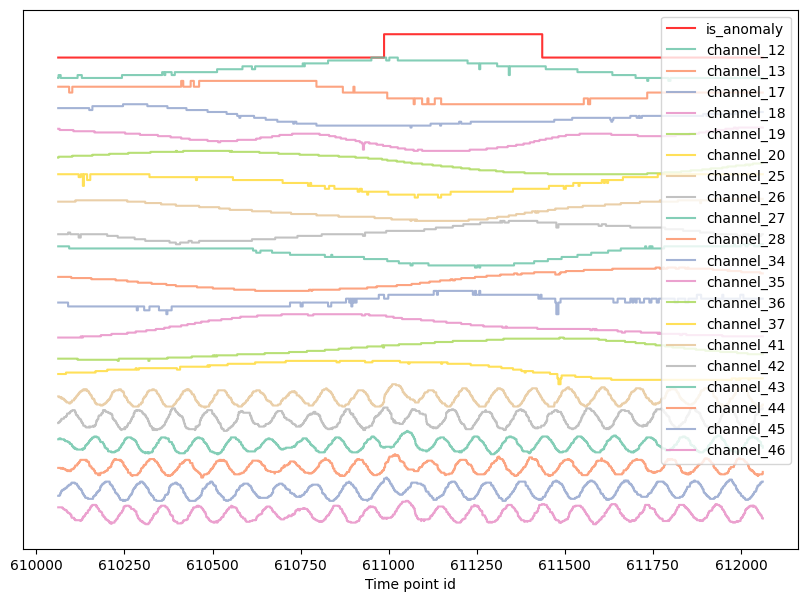

In [37]:
plt.rcParams["image.cmap"] = "Set2"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
plt.figure(figsize=(10,7))

start_idx = 610062
end_idx = start_idx + 2000

plt.step(np.arange(start_idx,end_idx+1), train_df.loc[start_idx:end_idx, "is_anomaly"] + 1, alpha=0.8, label="is_anomaly", where="post", color="red")

for i, channel in enumerate(channel_names):
    d = x_train.loc[start_idx:end_idx, channel]
    d = (d - np.min(d))/(np.max(d) - np.min(d))

    plt.step(np.arange(start_idx,end_idx+1), d - i, alpha=0.8, label=channel, where="post")

plt.xlabel("Time point id")
plt.yticks([], [])
plt.legend(loc="upper right")

In [71]:
N = 2000 # window size
n = 100 # samples to estimate the covariance
bs = 256

p = x_train.shape[1]
max_start = x_train.shape[0]-N

cov = np.zeros((N, p, p))
cov_hat = np.zeros((N, p, p))
for i in tqdm(range(1,n+1)):
    starts = np.random.randint(0, max_start, size=bs)
    windows = [x_train.iloc[start:start+N].to_numpy() for start in starts]
    x = np.stack(windows).transpose(1,0,2)
    
    x_hat = np.fft.fft(x, axis=0)
    mu = np.mean(x_hat, axis=1, keepdims=True)
    x_hat = x_hat - mu

    cov_i = x.transpose(0,2,1) @ x
    cov_hat_i = x_hat.transpose(0,2,1) @ x_hat

    cov = (cov + cov_i/(i*bs)) *(i/(i+1))
    cov_hat = (cov_hat + cov_hat_i/(i*bs)) *(i/(i+1))

np.save("data/cov.npy", cov)
np.save("data/cov_hat.npy", cov_hat)

100%|██████████| 100/100 [05:51<00:00,  3.52s/it]


In [72]:
cov = np.load("data/cov.npy")
cov_hat = np.load("data/cov_hat.npy")

In [75]:
from fpca import FPCA, FFPCA

In [76]:
fpca1 = FPCA()
ffpca1 = FFPCA()
fpca1.set_eigenvectors(cov)
ffpca1.set_eigenvectors(cov_hat)

array([[[-2.45145451e-01+0.00000000e+00j,
         -1.11203619e-01+0.00000000e+00j,
         -1.38899569e-02+0.00000000e+00j, ...,
         -2.98935798e-01+0.00000000e+00j,
         -3.67670294e-01+0.00000000e+00j,
          3.41823115e-01+0.00000000e+00j],
        [-2.40865495e-01+0.00000000e+00j,
         -1.36731300e-01+0.00000000e+00j,
         -1.46909277e-02+0.00000000e+00j, ...,
          2.27313227e-01+0.00000000e+00j,
          3.55304850e-01+0.00000000e+00j,
         -4.80007709e-02+0.00000000e+00j],
        [-2.43419810e-01+0.00000000e+00j,
         -1.19478043e-01+0.00000000e+00j,
          4.61541127e-02+0.00000000e+00j, ...,
         -5.41513382e-02+0.00000000e+00j,
         -5.21873359e-01+0.00000000e+00j,
          1.01024649e-01+0.00000000e+00j],
        ...,
        [ 1.63713914e-01+0.00000000e+00j,
         -3.17991553e-01+0.00000000e+00j,
          9.25292679e-01+0.00000000e+00j, ...,
          4.00322655e-03+0.00000000e+00j,
          3.34048507e-02+0.00000000e+00j